## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [52]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [53]:
df = pd.read_csv('ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the cell below to find the number of rows in the dataset.

In [54]:
df.shape[0]
#number of rows in the dataset = 294478

294478

c. The number of unique users in the dataset.

In [55]:
df.user_id.nunique()
#Number of unique users in the dataset = 290584

290584

d. The proportion of users converted.

In [56]:
df.converted.mean()
#Overall proportion of users converted (not accounting for incorrect/duplicate data) = 0.11966 (11.97%)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [57]:
df.query('(group == "treatment" and landing_page != "new_page") \
    or (group == "control" and landing_page != "old_page")').shape[0]
#Total number of times new_page and treatment don't line up = 3893

3893

f. Do any of the rows have missing values?

In [58]:
df.isnull().any()
#none of the rows have missing values

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [59]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") \
    or (group == "control" and landing_page == "old_page")')

In [60]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
#confirmed all the correct rows were removed

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [61]:
df2.user_id.nunique()
#290584 unique user_ids in df2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [62]:
df2[df2.user_id.duplicated()]
#user_id 773192 is duplicated

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [63]:
df2[df2['user_id']==773192]
#timestamps are different, suggesting the user visited the new page twice

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [64]:
df2.drop(index=1899, inplace=True)
#dropped the older instance

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [65]:
df2.user_id.duplicated().any()
#confirmed duplicate is removed

False

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [66]:
df2.converted.mean()
#0.1196 probability of conversion regardless of page received

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [67]:
p_old_convert = df2.query('group == "control"').converted.mean()
p_old_convert
#probability of conversion for individuals in the control group is .1204 (12.04%)

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [68]:
p_new_convert = df2.query('group == "treatment"').converted.mean()
p_new_convert
#probability of conversion for individuals in the treatment group is .1188 (11.88%)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [69]:
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
#.5001 (50.01%) probability that an individual recieved the new page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

***Answer:*** Considering the treatment group had a lower conversion rate than the control group, it doesn't look like the new treatment page leads to more conversions.  This is as evidenced by the results of question 4c above compared to question 4b (i.e. .1188 vs .1204 conversion rate for treatment vs control respectively)

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

***Answer:***  
> Null Hypothesis **$(H_{0}): p_{new} <= p_{old}$**

> Alternative Hypothesis **$(H_{1}): p_{new} > p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [98]:
pnew = df2.converted.mean()
pnew
#convert rate for Pnew is .1196

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [99]:
#As per instructions, we assume the convert rate for Pold = Pnew = .1196
pold = pnew
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [100]:
n_new = df2.query('group == "treatment"').shape[0]
n_new
#145310 individuals in the treatment grouop

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [101]:
n_old = df2.query('group == "control"').shape[0]
n_old
#145274 individuals in the control group

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [102]:
new_page_converted = np.random.choice(2, p=[1-pnew, pnew], size = n_new)

In [103]:
new_page_converted.mean()

0.12068680751496801

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [104]:
old_page_converted = np.random.choice(2, p=[1-pold, pold], size = n_old)
old_page_converted.mean()

0.12039318804466044

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [105]:
new_page_converted.mean() - old_page_converted.mean()
#difference is tiny

0.00029361947030756563

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [106]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice(2, p=[1-pnew, pnew], size = n_new)
    old_page_converted = np.random.choice(2, p=[1-pold, pold], size = n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

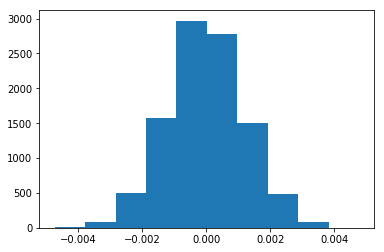

In [107]:
plt.hist(p_diffs);
# Given we bootstrapped the sample distribution, it has a normal distribution
# This is as expected given the central limit theorem which specifies as sample sizes grow, the distribution converges to a normal distribution
# Also given pnew = pold, the roughly mirrored distribution around 0 looks as expected as well

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [108]:
#actual difference observed as per first section of this project:
actual_diff = p_new_convert - p_old_convert
#proportion of the p_diffs greater than the actual difference observed in ab_data.csv
(p_diffs > actual_diff).mean()

0.90580000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

This value we just computed in part j is the p-value.  Given the p-value of .906 (90.6%) is much higher than the desired Type I error rate (alpha) of 5% error, this means there is no statistically significant difference between the new and old pages (i.e. hence we fail to reject the null hypothesis).

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [111]:
#df2.query('group == "control" and converted == 1').shape[0]
df2.query('group == "treatment" and converted == 1').shape[0]

17264

In [112]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0] #previously defined, but can redefine
n_new = df2.query('group == "treatment"').shape[0] #previously defined, but can redefine

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [113]:
#NOTE: the provided link above does NOT work: http://knowledgetack.com/python/statsmodels/proportions_ztest/
#the below is my best attempt:
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])

stat, pval = sm.stats.proportions_ztest(count, nobs, 0)
print('stat value of {0:0.3f}'.format(stat))
print('pval of {0:0.3f}'.format(pval)) 

stat value of 1.311
pval of 0.190


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

**Note:** Again, as stats.proportions_ztest and the concept of a ztest was not covered (see previous cell), my answer is my best attempt at explaining material that was not properly explained in this course:

**Answer:** The z-score and p-value again suggest failure to reject the null hypothesis which agrees with the findings in part j and k. In fact the p-value calculated using stats.proportions_ztest is higher than when we used bootstrapping to simulate a sample distribution in j which further reinforces our original conclusion (i.e. that the new page does not result in higher conversion rates as the old page).

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

As the result of the A/B test can be only one of two outcomes (conversion or not), this qualifies as a categorical response variable for which the logistical regression technique is most applicable.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1
#First we establish an intercept column
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
#establish dummy variable columns for landing page (new aka ab_page vs old aka old_page)
#Note: we'll ignore old_page column for our regression to ensure we're working with a full_rank matrix
df2.head(3) #quick check of our results for confirmation

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:               8.077e-06
Time:                        00:34:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [35]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [36]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

***Answer:***
  According to the logistical regression model, the new page aka treatment page results in 0.985 times as likelihood to result in conversion compared to the control aka old page.  Better said, the old page is 1.015 times as likely to result in conversion compared to the new page, meaning it is more effective than the old page as far as resulting user conversions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
The p-value associated with ab_page as per the Logistic Regression model is 0.19.  The p-value is different from that found in Part II (i.e. .903) because the null and alternative hypotheses are different.  Part III alternative hypothesis doesn't attempt to define the directional impact of the new page versus old page, only that there is a difference in resulting conversions and conversely the null hypothesis for Part III is that there is no relationship/impact between the new page and conversion.

In contrast Part II's null hypothesis is that the new page results in either no difference OR less conversion and the alternative is that the new page results in a positive difference/improvement in conversion. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

***Answer***
It is a good idea to consider other factors in the regression model such as the date and or day of the week for which the user visited the page (as might be derived from the timestamp column).  For example, a user who visits on a weekend (or holiday) versus a weekday may be more patient and likely to convert and so if there is heavy weight as to when users visited the new page vs old page, that may skew the results one way or another. 

The disadvantage of adding other terms into the regression model is it can overtrain the model with what is just noise and/or overcomplicate and ultimately inhibit our ability to analyze the results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
import statsmodels.api as sm

In [38]:
df_c = pd.read_csv('countries.csv')
df_c.head(3)
#Looks like we can (left) join on the user_id from the original ab_data dataset

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [39]:
df_c.user_id.nunique()

290584

In [40]:
df_c.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [41]:
df3 = df2.join(df_c.set_index('user_id'), on='user_id', how='left')
df3.head()
#making left join explicit although that's the default

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US


In [42]:
#create dummy variables for the 3 countries
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3.head(3)
#quick confirmation of results - we'll ignore one country column to ensure full rank matrix

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US,0,0,1


In [46]:
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])
results2 = logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:               1.521e-05
Time:                        00:35:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [47]:
np.exp(results2.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

In [48]:
1/np.exp(results2.params)

intercept    7.364925
CA           1.041647
UK           0.990133
dtype: float64

***Question*** 
Does it appear that country had an impact on conversion? 

***Answer***
Based on the relatively high P-values for the countries of Canada and UK of 0.13 and .457 respectively, the country doesn't appear to have any statistically significant impact on conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
logit_mod3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:               2.323e-05
Time:                        00:35:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

Once again, we're finding associated p-values that are higher than an alpha of 5% (.05) meaning the results are not satistically significant enough to allow us to predict conversion (and reject the null hypothesis).

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [115]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0